In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files
from sklearn.preprocessing import StandardScaler


uploaded = files.upload()
df = pd.read_csv('Fraud.csv')

Saving Fraud.csv to Fraud.csv


In [2]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [3]:
#Dropping Null values
df_cleaned = df.dropna()

In [4]:
#Dropping French columns
french_columns_corrected = [
    'Type de plainte reçue', 'Pays', 'Province/État',
    'Catégories thématiques sur la fraude et la cybercriminalité',
    'Méthode de sollicitation', 'Genre', 'Langue de correspondance',
    'Type de plainte'
]
df_cleaned = df.drop(columns=french_columns_corrected)
print("Remaining Columns:\n", df_cleaned.columns)

Remaining Columns:
 Index(['Numéro d'identification / Number ID', 'Date Received / Date reçue',
       'Complaint Received Type', 'Country', 'Province/State',
       'Fraud and Cybercrime Thematic Categories', 'Solicitation Method',
       'Gender', 'Language of Correspondence',
       'Victim Age Range / Tranche d'âge des victimes', 'Complaint Type',
       'Number of Victims / Nombre de victimes',
       'Dollar Loss /pertes financières'],
      dtype='object')


In [5]:
#Standardizing the column names
columns = ['Number Id','Date Received','Complaint Received Type','Country','Province','Fraud and Cybercrime Thematic Categories','Solicitation Method','Gender','Language of Correspondence','Victim Age Range','Complaint Type','Number of Victims','Dollar Loss']
df_cleaned.columns = columns

In [6]:
#Converting the datatypes of appropriate fields.
df_cleaned['Date Received'] = pd.to_datetime(df_cleaned['Date Received'])
df_cleaned['Dollar Loss'] = pd.to_numeric(df_cleaned['Dollar Loss'].replace('[\$,]', '', regex=True), errors='coerce')

In [7]:
#Inserting a field financial loss(Yes/No) based on the amount of dollar loss. (False if 0 else true)
df_cleaned['Financial Loss'] = df_cleaned['Dollar Loss'].apply(lambda x: 'Yes' if x > 0 else 'No')

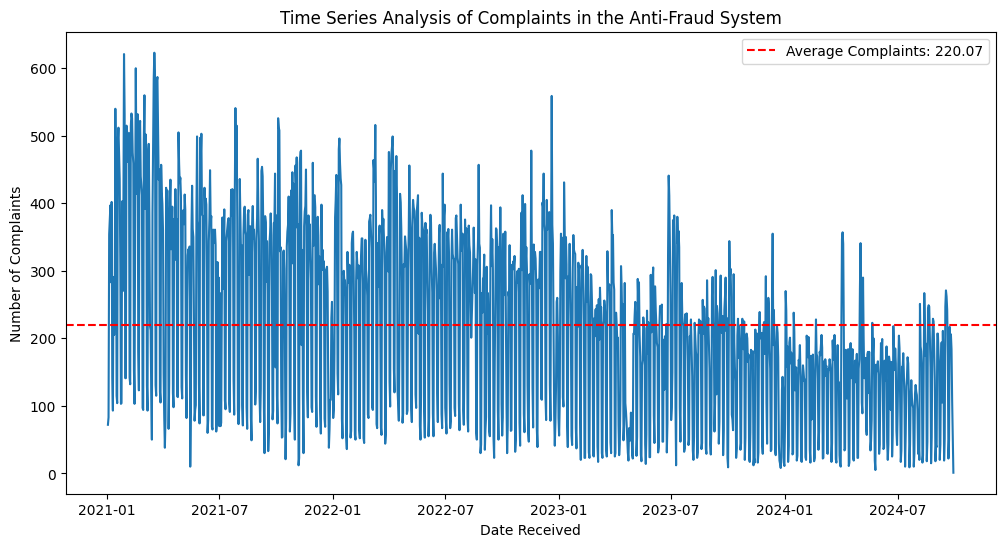

In [10]:
# Data Visualization
# Plotting a line chart visualization to show the time series analysis of the number of complaints filed in the Anti-Fraud system.
df_line = df_cleaned.groupby('Date Received')['Complaint Received Type'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Received', y='Complaint Received Type', data=df_line)

# Calculate the average number of complaints
average_complaints = df_line['Complaint Received Type'].mean()

# Add a horizontal reference line at the average
plt.axhline(y=average_complaints, color='red', linestyle='--', label=f'Average Complaints: {average_complaints:.2f}')

# Set labels and title
plt.xlabel("Date Received")
plt.ylabel("Number of Complaints")
plt.title("Time Series Analysis of Complaints in the Anti-Fraud System")

# Display legend
plt.legend()

# Show plot
plt.show()


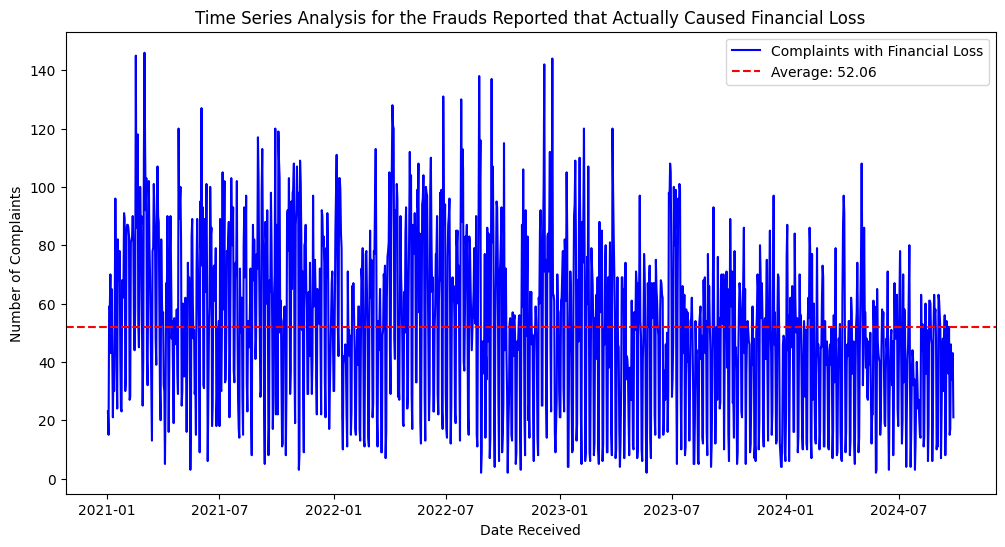

In [11]:
# Time Series Analysis for the frauds reported that actually caused financial loss.
df_line_loss = df_cleaned[df_cleaned['Financial Loss'] == 'Yes'].groupby('Date Received')['Complaint Received Type'].count().reset_index()
plt.figure(figsize=(12, 6))

# Plot the line plot
sns.lineplot(x='Date Received', y='Complaint Received Type', data=df_line_loss, label="Complaints with Financial Loss", color="blue")

# Calculate the average number of complaints that caused financial loss
average_loss_complaints = df_line_loss['Complaint Received Type'].mean()

# Add a horizontal reference line at the average
plt.axhline(y=average_loss_complaints, color='red', linestyle='--', label=f'Average: {average_loss_complaints:.2f}')

# Set labels and title
plt.xlabel("Date Received")
plt.ylabel("Number of Complaints")
plt.title("Time Series Analysis for the Frauds Reported that Actually Caused Financial Loss")

# Display legend
plt.legend()

# Show plot
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

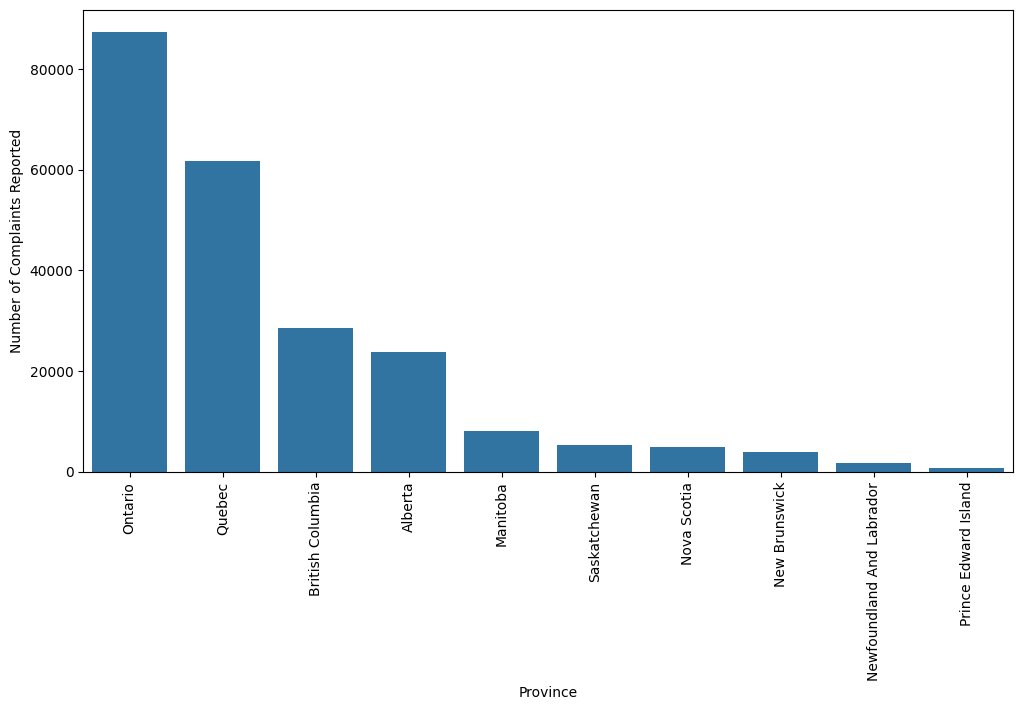

In [ ]:
#Identifying the top 10 states with Frauds reported.
df_bar_state = df_cleaned.groupby('Province')['Financial Loss'].count().reset_index()

#Filtering out the Not Specified row.
df_bar_state = df_bar_state[df_bar_state['Province'] != 'Not Specified']

#Sorting the dataset
df_bar_state = df_bar_state.sort_values(by='Financial Loss', ascending=False)

#Plotting a bar chart to visualize the same.
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Financial Loss', data=df_bar_state.head(10))
plt.xticks(rotation=90)
plt.ylabel("Number of Complaints Reported")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

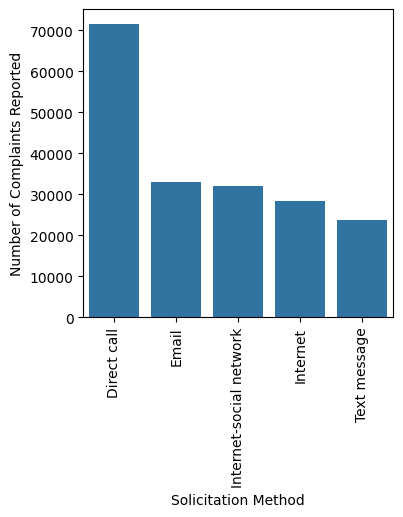

In [ ]:
#Identifying the top 5 solicitation methods.
df_bar_sol = df_cleaned.groupby('Solicitation Method')['Financial Loss'].count().reset_index()

#Filtering out the unknown values
df_bar_sol = df_bar_sol[df_bar_sol['Solicitation Method'] != 'Other/unknown']

df_bar_sol = df_bar_sol.sort_values(by='Financial Loss', ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(x='Solicitation Method', y='Financial Loss', data=df_bar_sol.head(5))
plt.xticks(rotation=90)
plt.ylabel("Number of Complaints Reported")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

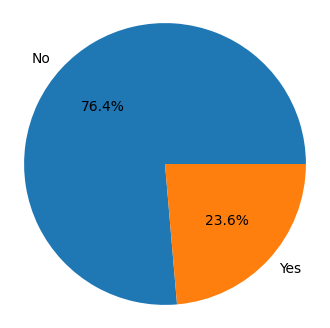

In [ ]:
#Plotting a pie chart to see the distribution of the complaints which resulted in a financial loss.
df_pie_loss = df_cleaned.groupby('Financial Loss')['Complaint Received Type'].count().reset_index()
plt.figure(figsize=(4, 4))
plt.pie(df_pie_loss['Complaint Received Type'], labels=df_pie_loss['Financial Loss'], autopct='%1.1f%%')
plt.axis('equal')
plt



In [ ]:
#Standardization of the columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
# Standardize the numeric columns
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

df_cleaned.head(10)


,Number Id,Date Received,Complaint Received Type,Country,Province,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Language of Correspondence,Victim Age Range,Complaint Type,Number of Victims,Dollar Loss,Financial Loss
0,-1.732045,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Attempt,-1.346668,-0.065162,No
1,-1.732033,2021-01-02,CAFC Website,Not Specified,Not Specified,Merchandise,Internet,Not Available,Not Available,'Not Available / non disponible,Victim,0.742574,-0.055077,Yes
2,-1.732022,2021-01-02,CAFC Website,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,0.742574,-0.065162,No
3,-1.732010,2021-01-02,CAFC Website,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,0.742574,-0.065162,No
4,-1.731999,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Male,Not Available,'60 - 69,Victim,0.742574,-0.062916,Yes
5,-1.731987,2021-01-02,CAFC Website,Canada,Ontario,Phishing,Text message,Male,English,'30 - 39,Attempt,-1.346668,-0.065162,No
6,-1.731976,2021-01-02,CAFC Website,Canada,British Columbia,Identity Fraud,Other/unknown,Female,English,'70 - 79,Victim,0.742574,-0.065162,No
7,-1.731964,2021-01-02,CAFC Website,Canada,British Columbia,Vendor Fraud,Text message,Male,English,'10 - 19,Victim,0.742574,-0.062136,Yes
8,-1.731953,2021-01-02,CAFC Website,Not Specified,Not Specified,Other,Internet,Male,English,'Not Available / non disponible,Other,-1.346668,-0.065162,No
9,-1.731941,2021-01-02,CAFC Website,Canada,Quebec,Phishing,Text message,Female,English,'40 - 49,Victim,0.742574,-0.065162,No


In [ ]:
df_cleaned.shape

(300171, 15)

In [ ]:
#Identifying the outliers
df_cleaned['z_score'] = (df_cleaned['Dollar Loss'] - df_cleaned['Dollar Loss'].mean()) / df_cleaned['Dollar Loss'].std()
outliers = df_cleaned[df_cleaned['z_score'].abs() > 3]
print("Outliers:\n", outliers)

Outliers:
         Number Id Date Received Complaint Received Type Country  \
260     -1.729045    2021-01-04            CAFC Website  Canada   
267     -1.728964    2021-01-04                   Email  Canada   
1537    -1.714307    2021-01-07            CAFC Website  Canada   
2707    -1.700805    2021-01-13            CAFC Website  Canada   
3317    -1.693765    2021-01-14                   Phone  Canada   
...           ...           ...                     ...     ...   
299233   1.721232    2024-09-22            CAFC Website  Canada   
299398   1.723136    2024-09-23                   Phone  Canada   
299579   1.725225    2024-09-24                   Phone  Canada   
299728   1.726944    2024-09-25            CAFC Website  Canada   
299917   1.729125    2024-09-26            CAFC Website  Canada   

                Province    Fraud and Cybercrime Thematic Categories  \
260              Ontario                                 Investments   
267              Ontario                

In [ ]:
#Generating a time series model to predict the number of complaints resulting in a financial loss.
#Filtering the data for only the instances where financial loss is reported.
df_time_series = df_cleaned[df_cleaned['Financial Loss'] == 'Yes']

#Converting the date column to month,year format
df_time_series['Date Received'] = pd.to_datetime(df_time_series['Date Received'])
df_time_series['Month'] = df_time_series['Date Received'].dt.strftime('%Y-%m')

#Grouping the data based on week.
df_time_series = df_time_series.groupby('Month')['Financial Loss'].count().reset_index(name = 'Number of Complaints')

<ipython-input-33-0e46b79b3fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Date Received'] = pd.to_datetime(df_time_series['Date Received'])
<ipython-input-33-0e46b79b3fe5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Month'] = df_time_series['Date Received'].dt.strftime('%Y-%m')


In [ ]:
#Building the time series model.
#Splitting the data into test and train by selecting the first 70% of the data for training and next 30% to test.
train_size = int(len(df_time_series) * 0.7)
train_data_time_series = df_time_series[:train_size]
test_data_time_series = df_time_series[train_size:]

#Building a timeseries model using the train data.
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model_time_series = ARIMA(train_data_time_series['Number of Complaints'], order=(1, 1, 1))
model_fit_time_series = model_time_series.fit()

#Predicting the test data and calculating the model's accuracy
# Predicting the test data
forecast_time_series = model_fit_time_series.forecast(steps=len(test_data_time_series))

# Actual values
actual_values = test_data_time_series['Number of Complaints'].values

# Calculating the MAPE (Mean Absolute Percentage Error) for model evaluation.
mape = np.mean(np.abs((actual_values - forecast_time_series) / actual_values)) * 100

# Calculate RMSE
rmse = np.sqrt(np.mean((actual_values - forecast_time_series) ** 2))

# Display the results
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")



Mean Absolute Percentage Error (MAPE): 33.95902683108103%
Root Mean Squared Error (RMSE): 423.10562987656596


In [ ]:
#Binary encoding for features
#Importing category encoders library
!pip install category_encoders
import category_encoders as ce

#Separating Features and Target variable.
X = df_cleaned.drop(columns=['Financial Loss'])
y = df_cleaned['Financial Loss']

# InitializING Binary Encoder
encoder = ce.BinaryEncoder(cols=X.select_dtypes(include=['object', 'category']).columns)

# Fit and Transform the features
X_encoded = encoder.fit_transform(X)

#Combining features with target to get an encoded dataset.
df_encoded = pd.concat([X_encoded, y], axis=1)


In [ ]:
df_encoded.shape

(300171, 47)

In [ ]:
#Building a Logistic Regression Model to predict whether the fraud reported will result in a financial loss.
#Creating a separate df for Logistic Regression Model.
df_logistic = df_encoded.copy()

#Converting the Financial Loss column to 1 and 0 for LR model.
df_logistic['Financial Loss'] = df_logistic['Financial Loss'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
## Separating features and target variable
X_log = df_logistic.drop(columns=['Financial Loss'])
y_log = df_logistic['Financial Loss']
X_log.head(10)

,Number Id,Date Received,Complaint Received Type_0,Complaint Received Type_1,Complaint Received Type_2,Complaint Received Type_3,Country_0,Country_1,Country_2,Country_3,...,Victim Age Range_0,Victim Age Range_1,Victim Age Range_2,Victim Age Range_3,Complaint Type_0,Complaint Type_1,Complaint Type_2,Number of Victims,Dollar Loss,z_score
0,-1.732045,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,-1.346668,-0.065162,-0.065162
1,-1.732033,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0.742574,-0.055077,-0.055077
2,-1.732022,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0.742574,-0.065162,-0.065162
3,-1.732010,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0.742574,-0.065162,-0.065162
4,-1.731999,2021-01-02,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0.742574,-0.062916,-0.062916
5,-1.731987,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,-1.346668,-0.065162,-0.065162
6,-1.731976,2021-01-02,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0.742574,-0.065162,-0.065162
7,-1.731964,2021-01-02,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0.742574,-0.062136,-0.062136
8,-1.731953,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,-1.346668,-0.065162,-0.065162
9,-1.731941,2021-01-02,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0.742574,-0.065162,-0.065162


In [ ]:
#Undersampling the majority class to balance the dataset.
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampler
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_log, y_log)

# Create a new balanced DataFrame
df_balanced_log = pd.DataFrame(X_resampled, columns=X_log.columns)
df_balanced_log['Financial Loss'] = y_resampled


In [ ]:
#Checking for balanced dataset.
df_balanced_log.groupby('Financial Loss')['Financial Loss'].count()

,Financial Loss
Financial Loss,
0,70959
1,70959


In [ ]:
#Building a Logistic Regression Model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Converting the datetime field to Timestamp
for col in X_resampled.select_dtypes(include=['datetime64']).columns:
    X_resampled[col] = X_resampled[col].astype(int)  / 10**9 # Convert datetime to Unix timestamp (seconds)

#Splitting the dataset df_balanced_log into train and test.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#Building the logistic regression model on test data.
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

#Testing the model on test data.
y_pred = model_log.predict(X_test)

#Evaluating the model.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5002583615182262
Precision: 0.5002583615182262
Recall: 1.0
F1 Score: 0.6668962818003914


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9293498684704998
Precision: 0.9136924955896323
Recall: 0.9483543828348748
F1 Score: 0.930700824770769
Dropped Features: Index(['Country_0', 'Province_0'], dtype='object')


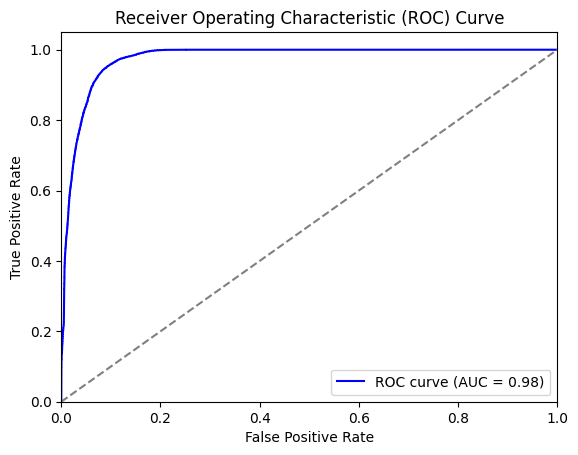

AUC: 0.98


In [ ]:
#Feature Selection for Logistic Regression Model.
#Create and fit the LASSO Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

#Predicting the values using lasso_model.
y_pred_lasso = lasso_model.predict(X_test)

#Evaluating the model.
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
precision_lasso = precision_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso)
f1_lasso = f1_score(y_test, y_pred_lasso)

#Print
print(f"Accuracy: {accuracy_lasso}")
print(f"Precision: {precision_lasso}")
print(f"Recall: {recall_lasso}")
print(f"F1 Score: {f1_lasso}")


#Checking the dropped features.
dropped_features = X_train.columns[lasso_model.coef_[0] == 0]
print("Dropped Features:", dropped_features)

#Building the ROC Curve and calculating the AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba = lasso_model.predict_proba(X_test)[:, 1]

# Build the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {auc_score:.2f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the resampled data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_filtered = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model_filtered.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_model_filtered.predict(X_test_rf)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0
Confusion Matrix:
 [[14173     0]
 [    0 14211]]


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


XGBoost Accuracy: 0.9976512589252161
XGBoost Precision: 0.9995287242565625
XGBoost Recall: 0.9957744495046715
XGBoost F1 Score: 0.9976480549414366
Confusion Matrix:
 [[21267    10]
 [   90 21209]]


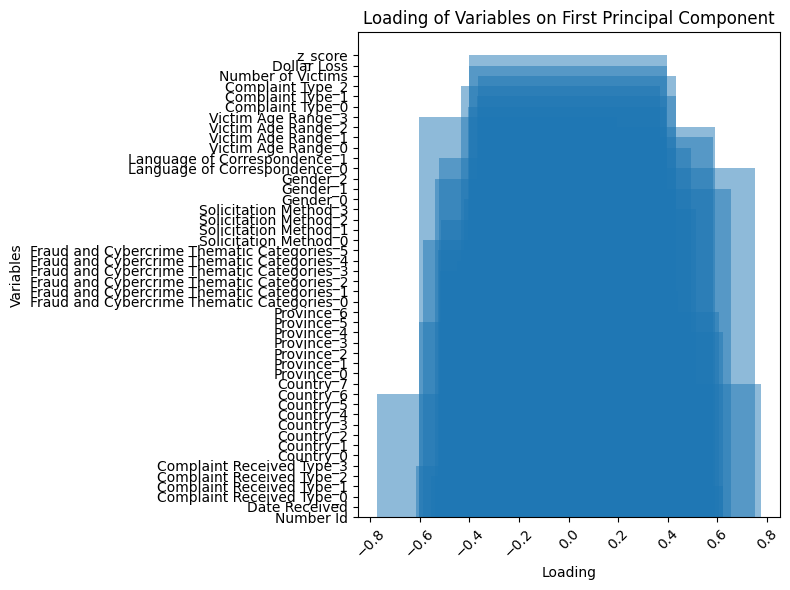

Number of principal components used: 33


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
# Plot loading of variables for the first principal component
plt.figure(figsize=(8, 6))
plt.bar(pca.components_[0],X_resampled.columns , alpha=0.5, align='center')
plt.title('Loading of Variables on First Principal Component')
plt.xlabel('Loading')
plt.ylabel('Variables')
plt.xticks(rotation=45)  # Rotate variable names if necessary
plt.tight_layout()
plt.show()

print(f"Number of principal components used: {pca.n_components_}")


In [ ]:
# Train the Random Forest model on PCA transformed data
rf_model_pca = RandomForestClassifier(random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

rf_model_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the PCA-transformed test set
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)

# Evaluate the Random Forest model with PCA
accuracy_rf_pca = accuracy_score(y_test_pca, y_pred_rf_pca)
precision_rf_pca = precision_score(y_test_pca, y_pred_rf_pca)
recall_rf_pca = recall_score(y_test_pca, y_pred_rf_pca)
f1_rf_pca = f1_score(y_test_pca, y_pred_rf_pca)

print(f"Random Forest with PCA Accuracy: {accuracy_rf_pca}")
print(f"Random Forest with PCA Precision: {precision_rf_pca}")
print(f"Random Forest with PCA Recall: {recall_rf_pca}")
print(f"Random Forest with PCA F1 Score: {f1_rf_pca}")


Random Forest with PCA Accuracy: 0.9397195603156708
Random Forest with PCA Precision: 0.9209321120689655
Random Forest with PCA Recall: 0.9622123706987545
Random Forest with PCA F1 Score: 0.9411197907705013


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np

# Define the number of splits for K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring metrics for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform K-Fold cross-validation for Random Forest
print("Random Forest - KFold Cross-Validation:")
rf_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=kfold, scoring='f1', n_jobs=-1)
print(f"F1 Scores (Random Forest): {rf_cv_scores}")
print(f"Average F1 Score (Random Forest): {np.mean(rf_cv_scores)}\n")

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform K-Fold cross-validation for XGBoost
print("XGBoost - KFold Cross-Validation:")
xgb_cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=kfold, scoring='f1', n_jobs=-1)
print(f"F1 Scores (XGBoost): {xgb_cv_scores}")
print(f"Average F1 Score (XGBoost): {np.mean(xgb_cv_scores)}\n")

#try on PCA-transformed data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Fold cross-validation on Random Forest with PCA-transformed data
print("Random Forest with PCA - KFold Cross-Validation:")
rf_cv_scores_pca = cross_val_score(rf_model, X_pca, y_resampled, cv=kfold, scoring='f1', n_jobs=-1)
print(f"F1 Scores (Random Forest with PCA): {rf_cv_scores_pca}")
print(f"Average F1 Score (Random Forest with PCA): {np.mean(rf_cv_scores_pca)}")


Random Forest - KFold Cross-Validation:
F1 Scores (Random Forest): [1. 1. 1. 1. 1.]
Average F1 Score (Random Forest): 1.0

XGBoost - KFold Cross-Validation:
F1 Scores (XGBoost): [0.99784992 0.99809349 0.9979885  0.99829992 0.9982429 ]
Average F1 Score (XGBoost): 0.9980949451593203

Random Forest with PCA - KFold Cross-Validation:
F1 Scores (Random Forest with PCA): [0.94080782 0.94208761 0.9386882  0.9422724  0.94032513]
Average F1 Score (Random Forest with PCA): 0.9408362307566721
